# Examples: Analyze Fastq Workflow
- Author: Marc Zepeda
- Date: 240925
- Locus: IKZF1 ZF2,3 Domain
## Import Packages

In [1]:
import edms.gen.io as io
import edms.bio.fastq as f
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# get_fastqs: Get fastq files from directory and store records in dataframes in a dictionary
- dir: directory with fastq files
- suf: file suffix (.fastq.gz or .fastq)
- quality: phred quality score threshold
- compressed: zipped file(s)?
- Dependencies: Bio.SeqIO, gzip, os, pandas, Bio.Seq.Seq

In [2]:
fastqs = f.get_fastqs(dir='../in/fastq')

MUZ137-43_S8_L001_R1_001:	59699 reads
MUZ137-66_S31_L001_R1_001:	78909 reads
MUZ137-44_S9_L001_R1_001:	67903 reads
MUZ137-72_S37_L001_R1_001:	89339 reads
MUZ137-48_S13_L001_R1_001:	67948 reads
MUZ137-50_S15_L001_R1_001:	75833 reads
MUZ137-53_S18_L001_R1_001:	88234 reads
MUZ137-60_S25_L001_R1_001:	69177 reads
MUZ137-63_S28_L001_R1_001:	83042 reads
MUZ137-56_S21_L001_R1_001:	83380 reads
MUZ137-58_S23_L001_R1_001:	77809 reads
MUZ137-68_S33_L001_R1_001:	94834 reads
MUZ137-52_S17_L001_R1_001:	71081 reads
MUZ137-46_S11_L001_R1_001:	56814 reads
MUZ137-62_S27_L001_R1_001:	90290 reads
MUZ137-70_S35_L001_R1_001:	86558 reads
MUZ137-41_S6_L001_R1_001:	73154 reads
MUZ137-61_S26_L001_R1_001:	82672 reads
MUZ137-51_S16_L001_R1_001:	77310 reads
MUZ137-59_S24_L001_R1_001:	73081 reads
MUZ137-45_S10_L001_R1_001:	67016 reads
MUZ137-67_S32_L001_R1_001:	75977 reads
MUZ137-42_S7_L001_R1_001:	63278 reads
MUZ137-69_S34_L001_R1_001:	85620 reads
MUZ137-57_S22_L001_R1_001:	76411 reads
MUZ137-49_S14_L001_R1_001:	72

In [3]:
fastqs['MUZ137-43_S8_L001_R1_001'].head()

,id,seq,phred_scores
0,M08188:135:000000000-GMHWV:1:1101:16383:1352,"(T, A, C, G, T, C, T, C, T, C, C, G, T, C, C, ...","[35, 34, 34, 35, 35, 37, 37, 37, 37, 37, 37, 3..."
1,M08188:135:000000000-GMHWV:1:1101:15531:1386,"(C, T, T, A, T, C, T, C, T, C, C, G, T, C, C, ...","[33, 34, 34, 33, 34, 37, 37, 37, 37, 37, 37, 3..."
2,M08188:135:000000000-GMHWV:1:1101:16773:1396,"(T, A, G, G, T, C, T, C, T, C, C, G, T, C, C, ...","[35, 34, 34, 35, 35, 37, 37, 37, 37, 37, 37, 3..."
3,M08188:135:000000000-GMHWV:1:1101:16273:1412,"(C, T, T, G, T, C, T, C, T, C, C, G, T, C, C, ...","[34, 34, 34, 34, 34, 37, 37, 37, 37, 37, 37, 3..."
4,M08188:135:000000000-GMHWV:1:1101:15914:1450,"(C, T, G, G, T, C, T, C, T, C, C, G, T, C, C, ...","[31, 32, 33, 31, 33, 37, 37, 37, 37, 37, 37, 3..."


# filter_fastqs: Gets DNA and AA sequence for records within flanks
- fastqs: dictionary from get_fastqs
- pt: path to PrimeDesign input file (Required unless flank5 and flank3 are provided)
- flank5: top strand flanking sequence 5' (Required unless pt is provided)
- flank3: top strand flanking sequence 3' (Required unless pt is provided)
- quality: phred quality score threshold within flanks
- Dependencies: get_fastqs(), pandas, Bio.Seq.Seq

In [4]:
fastqs_filtered = f.filter_fastqs(fastqs=fastqs,
                                  pt='../in/IKZF1_ZF2_3.csv',
                                  quality=20)

AGAACGGCCC
TTCCAGTGCAATCAGTGCGGGGCCTCATTCACCCAGAAGGGCAACCTGCTCCGGCACATCAAGCTGCATTCCGGGGAGAAGCCCTTCAAATGCCACCTCTGCAACTACGCCTGCCGCCGGAGGGACGCCCTCACTGGCCACCTGAGGACGCAC
TCCGGTAGGT
TTCCAGTGCAATCAGTGCGGGGCCTCATTCACCCAGAAGGGCAACCTGCTCCGGCACATCAAGCTGCATTCCGGGGAGAAGCCCTTCAAATGCCACCTCTGCAACTACGCCTGCCGCCGGAGGGACGCCCTCACTGGCCACCTGAGGACGCAC


/Users/marczepeda/anaconda3/lib/python3.11/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


MUZ137-43_S8_L001_R1_001:	58768 reads	=>	52688 reads


/Users/marczepeda/anaconda3/lib/python3.11/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


MUZ137-66_S31_L001_R1_001:	77763 reads	=>	69903 reads


/Users/marczepeda/anaconda3/lib/python3.11/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


MUZ137-44_S9_L001_R1_001:	66913 reads	=>	60420 reads


/Users/marczepeda/anaconda3/lib/python3.11/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


MUZ137-72_S37_L001_R1_001:	87970 reads	=>	80017 reads


/Users/marczepeda/anaconda3/lib/python3.11/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


MUZ137-48_S13_L001_R1_001:	66933 reads	=>	60819 reads


/Users/marczepeda/anaconda3/lib/python3.11/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


MUZ137-50_S15_L001_R1_001:	74701 reads	=>	67886 reads


/Users/marczepeda/anaconda3/lib/python3.11/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


MUZ137-53_S18_L001_R1_001:	86968 reads	=>	79142 reads


/Users/marczepeda/anaconda3/lib/python3.11/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


MUZ137-60_S25_L001_R1_001:	67983 reads	=>	61717 reads


/Users/marczepeda/anaconda3/lib/python3.11/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


MUZ137-63_S28_L001_R1_001:	81879 reads	=>	73165 reads


/Users/marczepeda/anaconda3/lib/python3.11/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


MUZ137-56_S21_L001_R1_001:	82149 reads	=>	74549 reads


/Users/marczepeda/anaconda3/lib/python3.11/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


MUZ137-58_S23_L001_R1_001:	76624 reads	=>	69394 reads


/Users/marczepeda/anaconda3/lib/python3.11/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


MUZ137-68_S33_L001_R1_001:	93353 reads	=>	84028 reads


/Users/marczepeda/anaconda3/lib/python3.11/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


MUZ137-52_S17_L001_R1_001:	69993 reads	=>	63600 reads


/Users/marczepeda/anaconda3/lib/python3.11/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


MUZ137-46_S11_L001_R1_001:	55996 reads	=>	50770 reads


/Users/marczepeda/anaconda3/lib/python3.11/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


MUZ137-62_S27_L001_R1_001:	88939 reads	=>	79771 reads


/Users/marczepeda/anaconda3/lib/python3.11/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


MUZ137-70_S35_L001_R1_001:	85187 reads	=>	77338 reads


/Users/marczepeda/anaconda3/lib/python3.11/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


MUZ137-41_S6_L001_R1_001:	72054 reads	=>	64975 reads


/Users/marczepeda/anaconda3/lib/python3.11/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


MUZ137-61_S26_L001_R1_001:	81500 reads	=>	73232 reads


/Users/marczepeda/anaconda3/lib/python3.11/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


MUZ137-51_S16_L001_R1_001:	76170 reads	=>	69068 reads


/Users/marczepeda/anaconda3/lib/python3.11/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


MUZ137-59_S24_L001_R1_001:	72016 reads	=>	65557 reads


/Users/marczepeda/anaconda3/lib/python3.11/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


MUZ137-45_S10_L001_R1_001:	65986 reads	=>	60127 reads


/Users/marczepeda/anaconda3/lib/python3.11/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


MUZ137-67_S32_L001_R1_001:	74693 reads	=>	66823 reads


/Users/marczepeda/anaconda3/lib/python3.11/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


MUZ137-42_S7_L001_R1_001:	62339 reads	=>	56238 reads


/Users/marczepeda/anaconda3/lib/python3.11/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


MUZ137-69_S34_L001_R1_001:	84238 reads	=>	76485 reads


/Users/marczepeda/anaconda3/lib/python3.11/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


MUZ137-57_S22_L001_R1_001:	75249 reads	=>	68374 reads


/Users/marczepeda/anaconda3/lib/python3.11/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


MUZ137-49_S14_L001_R1_001:	71178 reads	=>	64626 reads


/Users/marczepeda/anaconda3/lib/python3.11/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


MUZ137-55_S20_L001_R1_001:	69327 reads	=>	62768 reads


/Users/marczepeda/anaconda3/lib/python3.11/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


MUZ137-65_S30_L001_R1_001:	91888 reads	=>	82870 reads


/Users/marczepeda/anaconda3/lib/python3.11/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


MUZ137-71_S36_L001_R1_001:	88549 reads	=>	80426 reads


/Users/marczepeda/anaconda3/lib/python3.11/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


MUZ137-47_S12_L001_R1_001:	69076 reads	=>	63056 reads


/Users/marczepeda/anaconda3/lib/python3.11/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


MUZ137-64_S29_L001_R1_001:	87984 reads	=>	78984 reads


/Users/marczepeda/anaconda3/lib/python3.11/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


MUZ137-54_S19_L001_R1_001:	60649 reads	=>	54921 reads


In [5]:
fastqs_filtered['MUZ137-43_S8_L001_R1_001'].head()

,id,seq,phred_scores,nuc,prot
0,M08188:135:000000000-GMHWV:1:1101:15531:1386,"(C, T, T, A, T, C, T, C, T, C, C, G, T, C, C, ...","[33, 34, 34, 33, 34, 37, 37, 37, 37, 37, 37, 3...","(T, T, C, C, A, G, T, G, C, A, A, T, C, A, G, ...","(F, Q, C, N, Q, C, G, A, S, F, T, Q, K, G, N, ..."
1,M08188:135:000000000-GMHWV:1:1101:16273:1412,"(C, T, T, G, T, C, T, C, T, C, C, G, T, C, C, ...","[34, 34, 34, 34, 34, 37, 37, 37, 37, 37, 37, 3...","(T, T, C, C, A, G, T, G, C, A, A, T, C, A, G, ...","(F, Q, C, N, Q, C, G, A, S, F, T, Q, K, G, N, ..."
2,M08188:135:000000000-GMHWV:1:1101:15914:1450,"(C, T, G, G, T, C, T, C, T, C, C, G, T, C, C, ...","[31, 32, 33, 31, 33, 37, 37, 37, 37, 37, 37, 3...","(T, T, C, C, A, G, T, G, C, A, A, T, C, A, G, ...","(F, Q, C, N, Q, C, G, A, S, F, T, Q, K, G, N, ..."
3,M08188:135:000000000-GMHWV:1:1101:15750:1488,"(G, T, G, A, T, C, T, C, T, C, C, G, T, C, C, ...","[34, 34, 34, 35, 35, 37, 37, 37, 37, 37, 37, 3...","(T, T, C, C, A, G, T, G, C, A, A, T, C, A, G, ...","(F, Q, C, N, Q, C, G, A, S, F, T, Q, K, G, N, ..."
4,M08188:135:000000000-GMHWV:1:1101:16932:1501,"(T, T, A, T, T, C, T, C, T, C, C, G, T, C, C, ...","[32, 33, 33, 33, 33, 37, 37, 37, 37, 37, 37, 3...","(T, T, C, C, A, G, T, G, C, A, A, T, C, A, G, ...","(F, Q, C, N, Q, C, G, A, S, F, T, Q, K, G, N, ..."


# genotype: Assign genotypes to sequence records
- fastqs: dictionary from filter_fastqs
- res: First AA number
- pt: path to PrimeDesign input file (Required unless wt is provided)
- wt: Expected wildtype nucleotide sequence (in frame AA; required unless pt is provided)
- Dependencies: get_fastqs(),filter_fastqs(), pandas, Bio.Seq.Seq

In [ ]:
fastqs_genotyped = f.genotype(fastqs=fastqs_filtered,
                              pt='../in/IKZF1_ZF2_3.csv',
                              res=145)

In [7]:
fastqs_genotyped['MUZ137-43_S8_L001_R1_001'].head()

,id,seq,phred_scores,nuc,prot,edit
0,M08188:135:000000000-GMHWV:1:1101:15531:1386,"(C, T, T, A, T, C, T, C, T, C, C, G, T, C, C, ...","[33, 34, 34, 33, 34, 37, 37, 37, 37, 37, 37, 3...","(T, T, C, C, A, G, T, G, C, A, A, T, C, A, G, ...","(F, Q, C, N, Q, C, G, A, S, F, T, Q, K, G, N, ...",WT
1,M08188:135:000000000-GMHWV:1:1101:16273:1412,"(C, T, T, G, T, C, T, C, T, C, C, G, T, C, C, ...","[34, 34, 34, 34, 34, 37, 37, 37, 37, 37, 37, 3...","(T, T, C, C, A, G, T, G, C, A, A, T, C, A, G, ...","(F, Q, C, N, Q, C, G, A, S, F, T, Q, K, G, N, ...",WT
2,M08188:135:000000000-GMHWV:1:1101:15914:1450,"(C, T, G, G, T, C, T, C, T, C, C, G, T, C, C, ...","[31, 32, 33, 31, 33, 37, 37, 37, 37, 37, 37, 3...","(T, T, C, C, A, G, T, G, C, A, A, T, C, A, G, ...","(F, Q, C, N, Q, C, G, A, S, F, T, Q, K, G, N, ...",WT
3,M08188:135:000000000-GMHWV:1:1101:15750:1488,"(G, T, G, A, T, C, T, C, T, C, C, G, T, C, C, ...","[34, 34, 34, 35, 35, 37, 37, 37, 37, 37, 37, 3...","(T, T, C, C, A, G, T, G, C, A, A, T, C, A, G, ...","(F, Q, C, N, Q, C, G, A, S, F, T, Q, K, G, N, ...",WT
4,M08188:135:000000000-GMHWV:1:1101:16932:1501,"(T, T, A, T, T, C, T, C, T, C, C, G, T, C, C, ...","[32, 33, 33, 33, 33, 37, 37, 37, 37, 37, 37, 3...","(T, T, C, C, A, G, T, G, C, A, A, T, C, A, G, ...","(F, Q, C, N, Q, C, G, A, S, F, T, Q, K, G, N, ...",WT


# outcomes: Returns edit count & fraction per sample (tidy format)
- fastqs: dictionary from genotype
- Dependencies: get_fastqs(),filter_fastqs(),genotype(),pandas

In [8]:
fastqs_outcomes = f.outcomes(fastqs=fastqs_genotyped)

fastqs_outcomes['id']=[s.split('_')[0] for s in fastqs_outcomes['sample']]
io.save(dir='../out',
        file='fastq_outcomes.csv',
        obj=fastqs_outcomes)
fastqs_outcomes

,sample,edit,count,fraction,id
0,MUZ137-43_S8_L001_R1_001,WT,49185,0.933514,MUZ137-43
1,MUZ137-43_S8_L001_R1_001,C175R,2423,0.045988,MUZ137-43
2,MUZ137-43_S8_L001_R1_001,Indel,62,0.001177,MUZ137-43
3,MUZ137-43_S8_L001_R1_001,G169R,27,0.000512,MUZ137-43
4,MUZ137-43_S8_L001_R1_001,A181T,25,0.000474,MUZ137-43
...,...,...,...,...,...
9587,MUZ137-54_S19_L001_R1_001,Q156K,1,0.000018,MUZ137-54
9588,MUZ137-54_S19_L001_R1_001,H195N,1,0.000018,MUZ137-54
9589,MUZ137-54_S19_L001_R1_001,"R162L, T194M",1,0.000018,MUZ137-54
9590,MUZ137-54_S19_L001_R1_001,"C175*, A181T",1,0.000018,MUZ137-54


## Combine outcomes with metadata

In [9]:
meta = io.get('../in/240816_MUZ137_NGS.csv')
meta['id'] = meta['fastq_name']
fastqs_outcomes_meta = pd.merge(left=fastqs_outcomes,right=meta,how='left',on='id')
fastqs_outcomes_meta['Description'] = [f'{desc}; {fastqs_outcomes_meta.iloc[i]["Dose"]} uL' for i,desc in enumerate(fastqs_outcomes_meta['VLP Description'])]
io.save(dir='../out',
        file='fastq_outcomes_meta.csv',
        obj=fastqs_outcomes_meta)
fastqs_outcomes_meta

,sample,edit,count,fraction,id,ID,Cell ID,VLP ID,Dose,Replicate,...,PCR1 FWD,PCR1 REV,PCR2 FWD,PCR2 REV,"Reads, M",i7 Barcode,i5 Barcode,fastq_name,fastq,Description
0,MUZ137-43_S8_L001_R1_001,WT,49185,0.933514,MUZ137-43,3,Jurkat WT,1,10,1,...,spMUZ052,spMUZ053,FWD-2c,PE-REV4,0.1,TGACCAAT,CGCTCATT,MUZ137-43,fastq/MUZ137-43_S8_L001_R1_001.fastq.gz,VLP-PE; 10 uL
1,MUZ137-43_S8_L001_R1_001,C175R,2423,0.045988,MUZ137-43,3,Jurkat WT,1,10,1,...,spMUZ052,spMUZ053,FWD-2c,PE-REV4,0.1,TGACCAAT,CGCTCATT,MUZ137-43,fastq/MUZ137-43_S8_L001_R1_001.fastq.gz,VLP-PE; 10 uL
2,MUZ137-43_S8_L001_R1_001,Indel,62,0.001177,MUZ137-43,3,Jurkat WT,1,10,1,...,spMUZ052,spMUZ053,FWD-2c,PE-REV4,0.1,TGACCAAT,CGCTCATT,MUZ137-43,fastq/MUZ137-43_S8_L001_R1_001.fastq.gz,VLP-PE; 10 uL
3,MUZ137-43_S8_L001_R1_001,G169R,27,0.000512,MUZ137-43,3,Jurkat WT,1,10,1,...,spMUZ052,spMUZ053,FWD-2c,PE-REV4,0.1,TGACCAAT,CGCTCATT,MUZ137-43,fastq/MUZ137-43_S8_L001_R1_001.fastq.gz,VLP-PE; 10 uL
4,MUZ137-43_S8_L001_R1_001,A181T,25,0.000474,MUZ137-43,3,Jurkat WT,1,10,1,...,spMUZ052,spMUZ053,FWD-2c,PE-REV4,0.1,TGACCAAT,CGCTCATT,MUZ137-43,fastq/MUZ137-43_S8_L001_R1_001.fastq.gz,VLP-PE; 10 uL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9587,MUZ137-54_S19_L001_R1_001,Q156K,1,0.000018,MUZ137-54,14,Jurkat MUZ117.3,3,5,2,...,spMUZ052,spMUZ053,FWD-2b,PE-REV13,0.1,AGTCAACA,TCCGGAGA,MUZ137-54,fastq/MUZ137-54_S19_L001_R1_001.fastq.gz,VLP-PE (no RNA); 5 uL
9588,MUZ137-54_S19_L001_R1_001,H195N,1,0.000018,MUZ137-54,14,Jurkat MUZ117.3,3,5,2,...,spMUZ052,spMUZ053,FWD-2b,PE-REV13,0.1,AGTCAACA,TCCGGAGA,MUZ137-54,fastq/MUZ137-54_S19_L001_R1_001.fastq.gz,VLP-PE (no RNA); 5 uL
9589,MUZ137-54_S19_L001_R1_001,"R162L, T194M",1,0.000018,MUZ137-54,14,Jurkat MUZ117.3,3,5,2,...,spMUZ052,spMUZ053,FWD-2b,PE-REV13,0.1,AGTCAACA,TCCGGAGA,MUZ137-54,fastq/MUZ137-54_S19_L001_R1_001.fastq.gz,VLP-PE (no RNA); 5 uL
9590,MUZ137-54_S19_L001_R1_001,"C175*, A181T",1,0.000018,MUZ137-54,14,Jurkat MUZ117.3,3,5,2,...,spMUZ052,spMUZ053,FWD-2b,PE-REV13,0.1,AGTCAACA,TCCGGAGA,MUZ137-54,fastq/MUZ137-54_S19_L001_R1_001.fastq.gz,VLP-PE (no RNA); 5 uL


# stack: Creates stacked bar plot
- df: dataframe from outcomes
- x: x-axis column
- y: y-axis column
- cols: colors column
- cutoff: y-axis values needs be greater than (ex: 1%)
- Dependencies: plot.py,re,os,pandas,numpy,matplotlib.pyplot

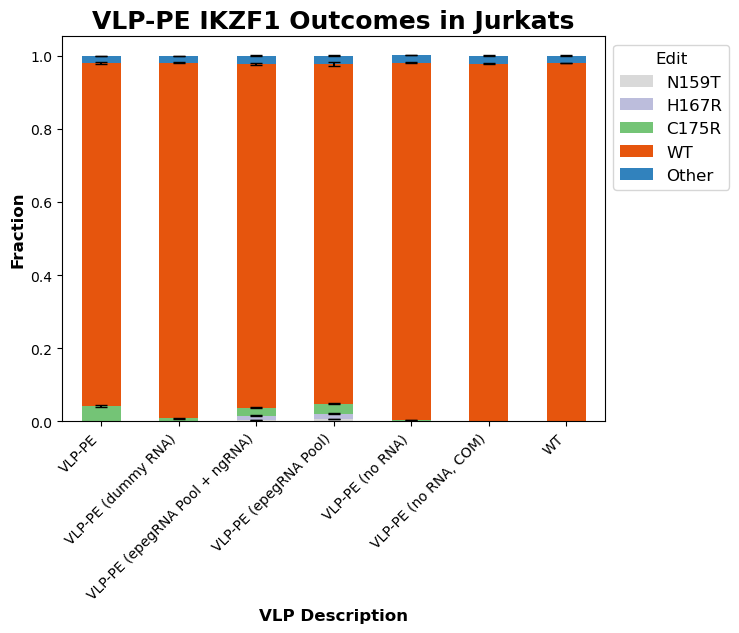

In [13]:
f.stack(fastqs_outcomes_meta,
        x='VLP Description',
        x_axis='VLP Description',
        y='fraction',
        cols='edit',
        cutoff=.002,
        title='VLP-PE IKZF1 Outcomes in Jurkats',
        figsize=(7,5),
        cmap='tab20c_r',
        dir='../out',
        file='stack.png')

# cat: Creates category dependent graphs.
- typ: plot type (bar, box, violin, swarm, strip, point, count, bar_swarm, box_swarm, violin_swarm)
- df: tidy dataframe
- x: x-axis column
- y: y-axis column
- Dependencies: os, matplotlib, seaborn, plot.py

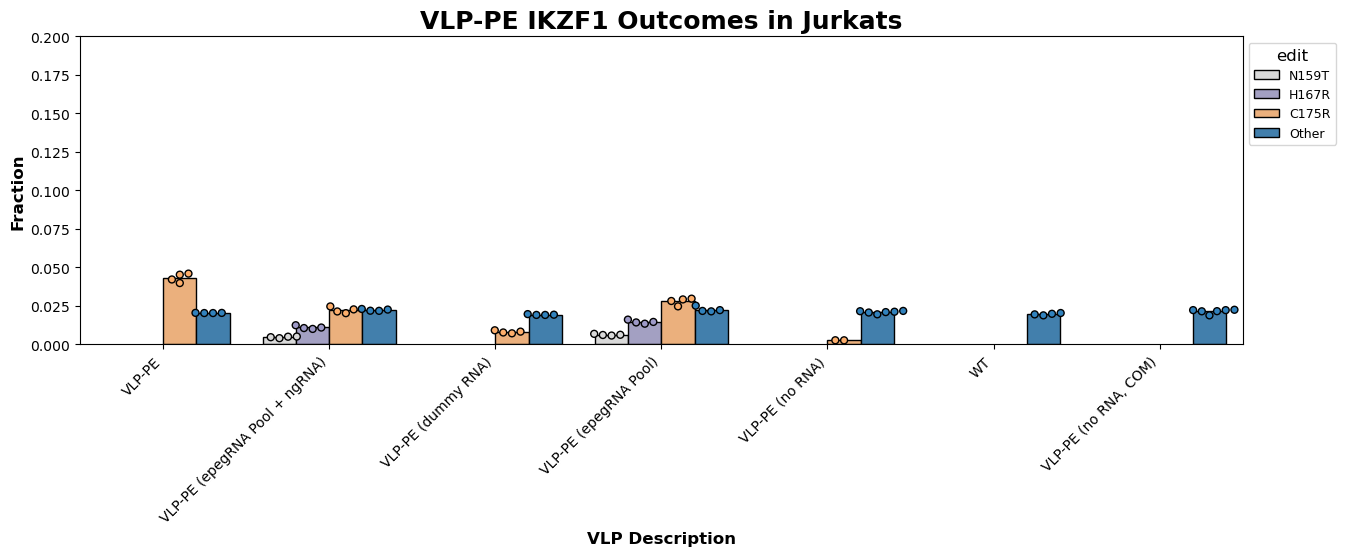

In [14]:
f.cat(typ='bar_swarm',
      df=fastqs_outcomes_meta,
      x='VLP Description',
      x_axis='VLP Description',
      x_ticks_rot=45,
      y='fraction',
      y_axis_dims=(0,.2),
      cols='edit',
      cols_exclude='WT',
      cutoff=.002,
      title='VLP-PE IKZF1 Outcomes in Jurkats',
      figsize=(15,4),
      palette_or_cmap='tab20c_r',
      legend_items=(4,8),
      dir='../out',
      file='cat.png')